In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [2]:
# Define directories
mainDir = 'D:\\Study\\S6\\Practicum Machine Learning\\Gemastik\\lego\\The IQ-OTHNCCD lung cancer dataset'
label = ['Bengin cases', 'Malignant cases', 'Normal cases']


In [3]:
# Create ImageDataGenerator instances for training, validation, and test sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
# Generate batches of tensor image data from the directories
train_generator = train_datagen.flow_from_directory(
    mainDir,
    target_size=(245, 245),  # Adjust based on your model's input size
    batch_size=16,
    class_mode='categorical',
)

validation_generator = validation_datagen.flow_from_directory(
    mainDir,
    target_size=(245, 245),
    batch_size=16,
    class_mode='categorical',
)

test_generator = test_datagen.flow_from_directory(
    mainDir,
    target_size=(245, 245),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

Found 1097 images belonging to 3 classes.
Found 1097 images belonging to 3 classes.
Found 1097 images belonging to 3 classes.


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(245, 245, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(3, activation='softmax')  # Change to the number of classes in your dataset
])

In [6]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
)

Epoch 1/50
68/68 [==============================] - 26s 252ms/step - loss: 10.9991 - accuracy: 0.4329 - val_loss: 7.6460 - val_accuracy: 0.5221
Epoch 2/50
68/68 [==============================] - 16s 237ms/step - loss: 4.7722 - accuracy: 0.5985 - val_loss: 14.8799 - val_accuracy: 0.5110
Epoch 3/50
68/68 [==============================] - 16s 241ms/step - loss: 3.2816 - accuracy: 0.5661 - val_loss: 29.0604 - val_accuracy: 0.5129
Epoch 4/50
68/68 [==============================] - 17s 245ms/step - loss: 1.6152 - accuracy: 0.5495 - val_loss: 2.7513 - val_accuracy: 0.6222
Epoch 5/50
68/68 [==============================] - 17s 255ms/step - loss: 1.1458 - accuracy: 0.6401 - val_loss: 2.9809 - val_accuracy: 0.5772
Epoch 6/50
68/68 [==============================] - 16s 239ms/step - loss: 1.0528 - accuracy: 0.6540 - val_loss: 1.1143 - val_accuracy: 0.6949
Epoch 7/50
68/68 [==============================] - 17s 242ms/step - loss: 0.9357 - accuracy: 0.6725 - val_loss: 25.9519 - val_accuracy: 0.

In [8]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print('Test accuracy:', test_accuracy)

68/68 [==============================] - 4s 55ms/step - loss: 0.6748 - accuracy: 0.7160
Test accuracy: 0.7159926295280457


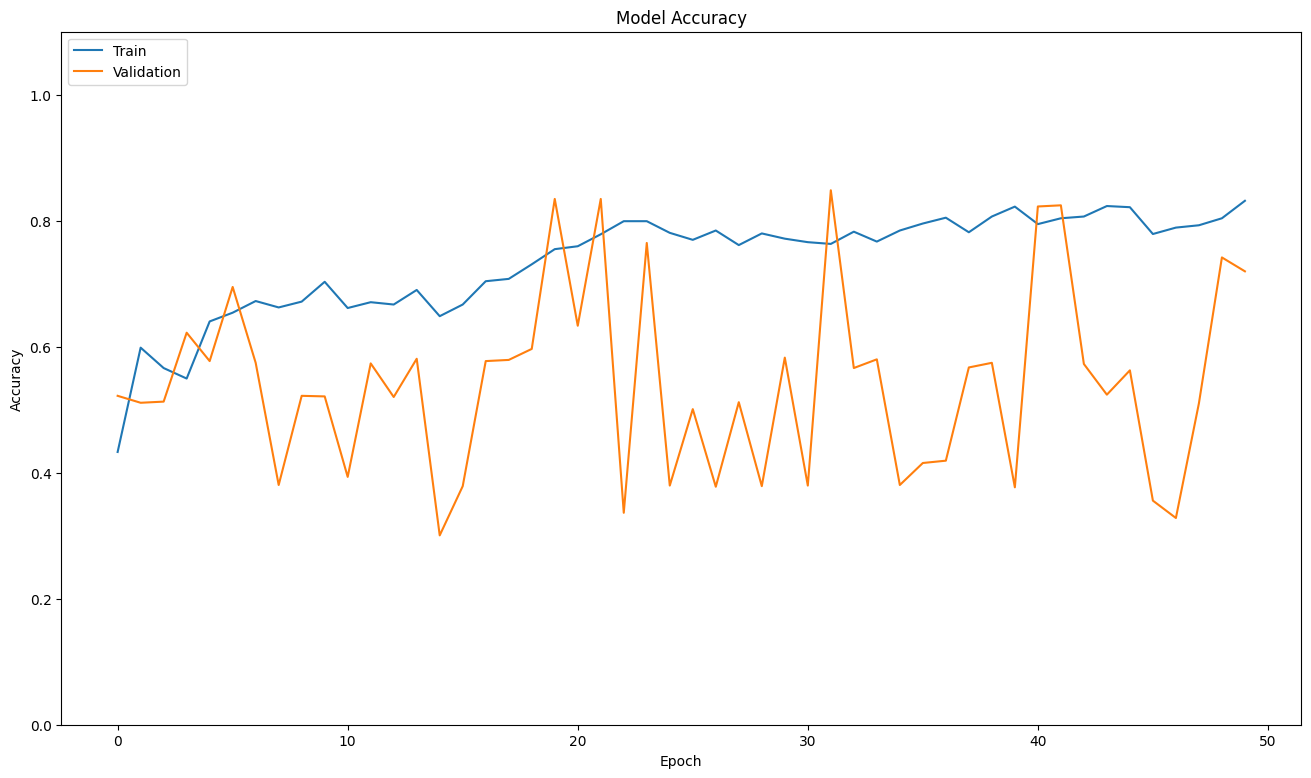

In [11]:
def plot_hist_Accuracy(hist):
    plt.figure(figsize=(16, 9))
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("Model Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Validation"], loc = "upper left")
    plt.ylim(0,1.1)
    plt.show()

plot_hist_Accuracy(history)

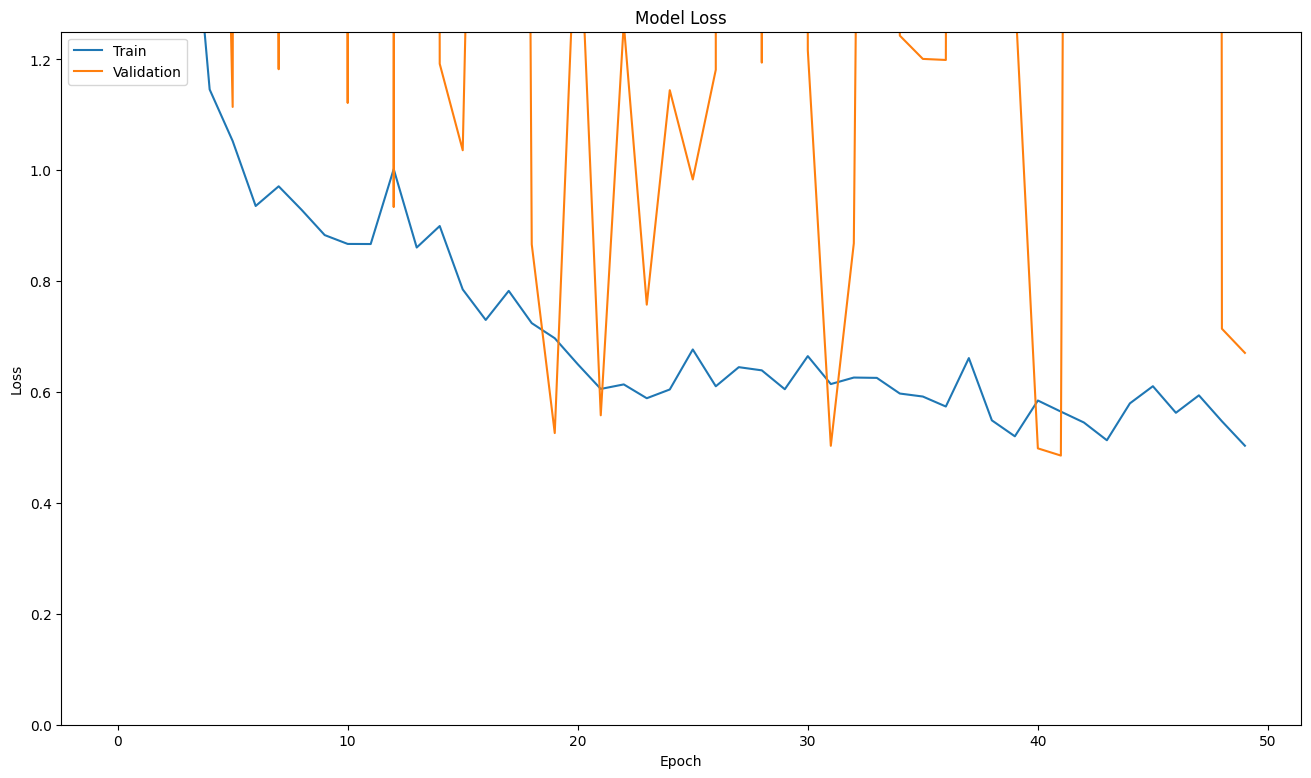

In [10]:
# Plot training & validation loss values
def plot_hist_loss(hist):
    plt.figure(figsize=(16, 9))
    plt.plot(hist.history['loss'], label='Training Loss')
    plt.plot(hist.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(["Train", "Validation"], loc = "upper left")
    plt.ylim(0,1.25)
    plt.show()

plot_hist_loss(history)